# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [269]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')
azdias = pd.read_csv('arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/Users/maurizio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looks we had some trouble already while importing with some features that have mixed types values

In [213]:
# These two featutres have mixed type float and string
azdias.iloc[:,18:20].head()

,CAMEO_DEUG_2015,CAMEO_INTL_2015
0,NaN,NaN
1,8,51
2,4,24
3,2,12
4,6,43


In [214]:
azdias.CAMEO_DEUG_2015.value_counts()

8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
X        373
Name: CAMEO_DEUG_2015, dtype: int64

In [215]:
azdias.CAMEO_INTL_2015.value_counts()

51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
XX        373
Name: CAMEO_INTL_2015, dtype: int64

This shows a problem with this table where there are same values that are different because of the type either int or fload

In [270]:
# Let's fix it straightaway
def fix_cameo (df):
    """
    
    """
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].replace({'X': np.nan})
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype(float)
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].replace({'XX':np.nan})
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].astype(float)
    return df

azdias = fix_cameo(azdias)

So the values X and XX in these two tables are to be considered "unknown" and converted to null. So in our initial cleaning we will check the values of the documented features against the documentation ( the "DIAS Attributes - Values 2017.xlsx" file) and consider the ones that fall outside the reanges priveded as null.


In [217]:
# Reading the features description excel file into a Dataframe
feat_info = pd.read_excel('DIAS Attributes - Values 2017.xlsx', sheet_name='Tabelle1', index_col=[0, 1, 2]).reset_index()
feat_info.drop('level_0', axis=1, inplace=True)
feat_info_levels = pd.read_excel('DIAS Information Levels - Attributes 2017.xlsx', index_col=[0, 1]).reset_index()
feat_info_levels.drop('level_0', axis=1, inplace=True) 

feat_info_levels.head()
feat_info[feat_info.Attribute=='CAMEO_DEUG_2015']

,Attribute,Description,Value,Meaning
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown
52,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,1,upper class
53,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,2,upper middleclass
54,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,3,established middleclasse
55,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,4,consumption-oriented middleclass
56,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,5,active middleclass
57,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,6,low-consumption middleclass
58,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,7,lower middleclass
59,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,8,working class
60,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,9,urban working class


In [218]:
# Turns out the feat_info dataset from the Excel spreadsheet has some columns that are not in the population dataset
# and vicecersa, Let's explore a bit
# These one are in the population and are described in the spreadsheet
attributes_we_have_info_about = np.intersect1d(feat_info.Attribute.unique(), np.array(azdias.columns))
# These one are in the population and are NOT described in the spreadsheet
attributes_we_dont_have_info = np.setdiff1d(np.array(azdias.columns), feat_info.Attribute.unique())
# These one are in the spreadsheet and are NOT in the population so we just ignore them for now
attributes_we_dont_care = np.setdiff1d(feat_info.Attribute.unique(), np.array(azdias.columns))

len(attributes_we_have_info_about), len(attributes_we_dont_have_info), len(attributes_we_dont_care)

(270, 96, 42)

In [219]:
# We can build a dataframe with atributes and type plus description of unknown values 
unknown_values = ['unknown', 'unknown / no main age detectable', 'no transactions known', 'numeric value (typically coded from 1-10)',
                 'numeric value (typically coded from 1-3)', 'no transaction known']
azdias_info =  feat_info[(feat_info.Attribute.isin(attributes_we_have_info_about)) & (feat_info.Meaning.isin(unknown_values))]
# Add the ones who don't have unknown values

# Add columns that are in the excel spreadhseet but don't have a "unkmown value"
for feat in np.setdiff1d(feat_info.Attribute[attributes_we_have_info_about].index, azdias_info.Attribute):
    azdias_info = azdias_info.append(feat_info[feat_info.Attribute == feat].iloc[0,:2])

# Finally add columns missing if the excel spreadsheet
azdias_info = pd.concat([azdias_info, pd.DataFrame(np.setdiff1d(azdias.columns.values, azdias_info.Attribute), columns=['Attribute'])], sort=False, axis=0)

# Adding a Type column initially setting everything to 'Ordinal' 
azdias_info['Type'] = 'Ordinal'
azdias_info.to_csv('azdias_info.csv')

In [271]:
# Reload file after working on in in Excel
azdias_info = pd.read_csv('azdias_info_reload.csv', index_col=[0])

azdias_info.head()
#azdias_info.Type.value_counts()

,Attribute,Description,Meaning,Value,Type,Notes
0,AGER_TYP,best-ager typology,unknown,-1,Ordinal,NaN
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,unknown,"-1, 0",Ordinal,NaN
11,ALTER_HH,main age within the household,unknown / no main age detectable,0,Ordinal,NaN
33,ANREDE_KZ,gender,unknown,"-1, 0",Binary,NaN
36,ANZ_HAUSHALTE_AKTIV,number of households in the building,numeric value (typically coded from 1-10),0,Numeric,NaN


So we will start handling the features that are documented for now and run some cleaning scripts, then we will explore the undocumented ones and decide what to do with them.

In [272]:
# Check values for a random feature
# split a string is a string otherwise return unchanged
def split_if_string(x):
    if isinstance(x, str):
        return x.split(',')
    else:
        return x
# Change ints into floats in a list and leave anything else unchanged
def to_float(x):
    try:
        x = float(x)
    except:
        pass
    return x

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [222]:
azdias_info[azdias_info.Type == 'Numeric'].Attribute.values

array(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'GEBURTSJAHR', 'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR',
       'ANZ_KINDER', 'ANZ_STATISTISCHE_HAUSHALTE', 'EINGEZOGENAM_HH_JAHR'],
      dtype=object)

In [223]:
# Now we will look for "undocumented" null values, that are not included in the spreadsheet
numerical_features =  azdias_info[azdias_info.Type == 'Numeric'].Attribute.values

attributes_to_check = np.setdiff1d(attributes_we_have_info_about, numerical_features)

# Better align values first as it is taking as different int and floats

def check_all_values(df, feat_info):
    for attribute in attributes_to_check:
        theoretical_vals = feat_info[feat_info.Attribute == attribute].Value.apply(lambda x: split_if_string(x)).values
        theoretical_vals = np.hstack(theoretical_vals)
        theoretical_vals = [to_float(x) for x in theoretical_vals]
        actual_values = df.loc[:, attribute].value_counts().index.values
        actual_values = [to_float(x) for x in actual_values]
        #diff = set(actual_values) - set(theoretical_vals)
        diff = np.setdiff1d(actual_values, theoretical_vals)
        if diff.size > 0:
            print('Attribute {} has undocumented values {}'.format(attribute, diff))

            
check_all_values(azdias, feat_info)

Attribute CAMEO_DEU_2015 has undocumented values ['XX']
Attribute KBA05_MODTEMP has undocumented values [6.]
Attribute LP_FAMILIE_FEIN has undocumented values [0.]
Attribute LP_FAMILIE_GROB has undocumented values [0.]
Attribute LP_LEBENSPHASE_FEIN has undocumented values [0.]
Attribute LP_LEBENSPHASE_GROB has undocumented values [0.]
Attribute ORTSGR_KLS9 has undocumented values [0.]


So here we have:

CAMEO_DEU_2015: most common building-type within the cell => XX is a null

KBA05_MODTEMP: development of the most common car segment in the neighbourhood: we keep 6.0 although it's not documented

LP_FAMILIE_FEIN: familytyp fine: 0 is a null, must be between 1 to 11

LP_FAMILIE_GROB familytyp rough, must be 1 to 11, so 0 is a null

LP_LEBENSPHASE_FEIN: lifestage fine, must be 1 to 40, so 0 is a null

LP_LEBENSPHASE_GROB: lifestage rough, must be 1 to 12, so 0 is  a null

ORTSGR_KLS9: size of the community, 1 to 9, so 0 is a null


In [273]:
# we can fix those above
def fix_undocumented_nulls(df):
    dxx = {'XX':np.nan}
    d0 = {0:np.nan}
    df['CAMEO_DEU_2015'] = df['CAMEO_DEU_2015'].replace(dxx)
    df['LP_FAMILIE_FEIN'] = df['LP_FAMILIE_FEIN'].replace(d0)
    df['LP_FAMILIE_GROB'] = df['LP_FAMILIE_GROB'].replace(d0)
    df['LP_LEBENSPHASE_FEIN'] = df['LP_LEBENSPHASE_FEIN'].replace(d0)
    df['LP_LEBENSPHASE_GROB'] = df['LP_LEBENSPHASE_GROB'].replace(d0)
    df['ORTSGR_KLS9'] = df['ORTSGR_KLS9'].replace(d0)
    return df

azdias =  fix_undocumented_nulls(azdias)

Now we will use the dataframe we built with the nformation of whoch values cam be considered null to replace the unlknown values with null.
We leave the features that have a value equal to zero with Meaning "no transaction known"as they represent transactional activity over a period, so we interpret is as "zero transactions".


In [274]:
# Now let's convert the other nulls
#azdias_info.head()
import progressbar

def unknown2nulls(df, df_info):
    """"""
    
    n_iters = df_info.shape[0]
    cnter = 0
    bar = progressbar.ProgressBar(maxval=n_iters+1, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    
    for _, info_row in df_info[df_info.Value.notnull()].iterrows():
        #print('Replacing ', info_row.Attribute)
        if isinstance(info_row.Value, str):
            d = {}
            for unknown_value in info_row.Value.split(','):
                d[float(unknown_value)] = np.nan
            df[info_row.Attribute] = df[info_row.Attribute].replace(d)
        else:
            d = {info_row.Value : np.nan}
            df[info_row.Attribute] = df[info_row.Attribute].replace(d)
        cnter+=1 
        bar.update(cnter)
    
    bar.finish()            
    return df

azdias = unknown2nulls(azdias, azdias_info)

[========================================================================] 100%


In [ ]:
# Now we can save it
azdias.to_feather('azdias_nulls.feather')

### Choosing columns to drop
We will analyze the amount of missing data and choose which columns to drop.
Additionally some columns may be dropped for tyher reasons, for example:
- if they have all unique values
- if they are categorical values with too many different values, for example more than 10-15 categories
- when we don't have enough information to decide how to encode them
- features that are a possible source of ethical bias

In [ ]:
azdias = pd.read_feather('azdias_nulls.feather', nthreads=2)

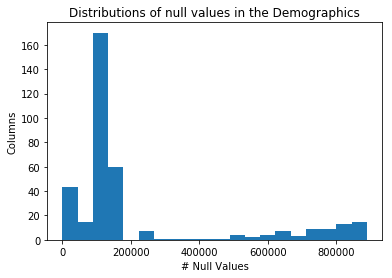

In [15]:
# Assess missing data in columns
plt.hist(azdias.isnull().sum(), bins=20)
plt.title('Distributions of null values in the Demographics')
plt.xlabel('# Null Values')
plt.ylabel('Columns');

Text(0.5,1,'Attributes with more than 30% of missing values')

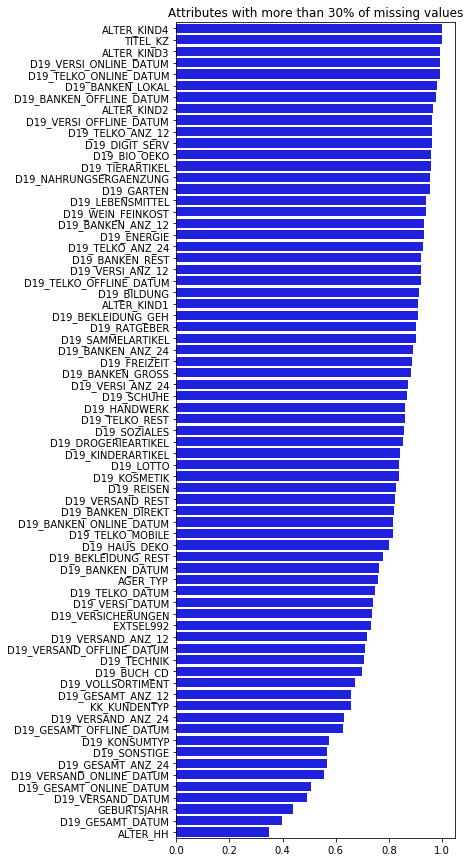

In [16]:
# Investigate patterns in the amount of missing data in each column.
columns = azdias.isnull().sum().sort_values(ascending=False)
percent_missing = columns/azdias.shape[0]
data = percent_missing[percent_missing > 0.3]
plt.figure(figsize=(5,15))
sns.barplot(y=data.index, x=data.values, orient='h', color='blue')
plt.title("Attributes with more than 30% of missing values")

In [275]:
#The distribution above shows that some outlier features have more thn 250000 null values. 
# Since we will run this script on the customer data set as well, we will use a % of the whole dataset =>28%
# Considering the dataset has 891221 data points, we can select those ones candidates features to be dropped

# The columns to drop should be the same on population and customer dataset, so we leave it outside the function
columns_to_drop = [s for s, v in (azdias.isnull().sum() > azdias.shape[0] * 0.3).items() if v]
    
def drop_columns(df):
    """
    
    """

    df = df.drop(columns_to_drop, axis=1)
    print("Dropped {} columns.".format(len(columns_to_drop)))
    
    return df

azdias = drop_columns(azdias)

Dropped 71 columns.


Column with unique values

In [ ]:
# Columns with unique values, doesn't give any information
azdias.LNR.value_counts().shape

In [ ]:
# So we will drop it
#azdias.drop('LNR', axis=1, inplace=True)

Features that are a possible source of ethical bias: NATIONALITAET_KZ

In [ ]:
# NATIONALITAET_KZ: possible source of ethical bias
#azdias.drop('NATIONALITAET_KZ', axis=1, inplace=True)

In [ ]:
# ALTERSKATEGORIE_FEIN and ALTERSKATEGORIE_GROB (age through prename analysis have different number of nulls, 
# in particular ALTERSKATEGORIE_FEIN has 262947 nulls so we prefer to drop it and keep the summary information)
#azdias.drop('ALTERSKATEGORIE_FEIN', axis=1, inplace=True)

In [267]:
# Data for this variable "type of building (residential or commercial)" is unbalanced between general population 
# and customers: The gen pop has only one commercial building (??) and customers has no residential building
# So we choose to frop it
azdias.GEBAEUDETYP.value_counts(), customers.GEBAEUDETYP.value_counts()

(1.0    460465
 3.0    178668
 8.0    152476
 2.0      4935
 4.0       900
 6.0       628
 5.0         1
 Name: GEBAEUDETYP, dtype: int64, 1.0    95145
 3.0    23655
 8.0    20475
 2.0     2057
 4.0      251
 6.0      142
 Name: GEBAEUDETYP, dtype: int64)

In [276]:
# We put all together in a function
other_columns_to_drop = ['LNR', 'NATIONALITAET_KZ', 'ALTERSKATEGORIE_FEIN', 'GEBAEUDETYP']
def drop_other_columns(df):
    """
    
    """
    df = df.drop(other_columns_to_drop, axis=1)
    return df

azdias = drop_other_columns(azdias)

Exploring Categiorical Features with Multi-values

In [277]:
# Let's have a look at the other categorical features (the ones who are left)
categorical_features = np.intersect1d(azdias_info[azdias_info.Type=='Categorical'].Attribute.values, azdias.columns.values)
categorical_to_drop = []
for categ in categorical_features:
    num_categs = azdias[categ].value_counts().shape[0]
    if num_categs > 15:
        print("Feature {} has {} categories".format(categ, num_categs))
        categorical_to_drop.append(categ)


categorical_to_drop
# We ca drop these features abd one-hot encode the other ones    

Feature CAMEO_DEU_2015 has 44 categories
Feature D19_LETZTER_KAUF_BRANCHE has 35 categories
Feature EINGEFUEGT_AM has 5162 categories
Feature LP_LEBENSPHASE_FEIN has 40 categories
Feature VERDICHTUNGSRAUM has 46 categories


['CAMEO_DEU_2015',
 'D19_LETZTER_KAUF_BRANCHE',
 'EINGEFUEGT_AM',
 'LP_LEBENSPHASE_FEIN',
 'VERDICHTUNGSRAUM']

In [278]:
# We will drop CAMEO_DEU_2015 (redundant), EINGEFUEGT_AM (has thousands of dates, not interesting), D19_LETZTER_KAUF_BRANCHE, VERDICHTUNGSRAUM, while it looks the other features carry important information:
# But we will keep LP_LEBENSPHASE_FEIN:  Lifestage (fine), as it has interesting information
# and CAMEO_DEUG_2015: CAMEO classification 2015 - Uppergroup
def drop_categorical(df):
    """
    """
    categorical_to_drop = ['CAMEO_DEU_2015','D19_LETZTER_KAUF_BRANCHE','EINGEFUEGT_AM','VERDICHTUNGSRAUM']
    df = df.drop(categorical_to_drop, axis=1)
    return df


azdias = drop_categorical(azdias)

### Missing Data in rows

Text(0,0.5,'Rows')

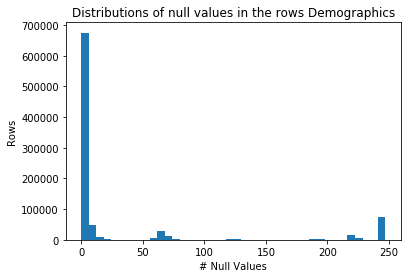

In [20]:
# How much data is missing in each row of the dataset?
plt.hist(azdias.isnull().sum(axis=1), bins=40)
plt.title('Distributions of null values in the rows Demographics')
plt.xlabel('# Null Values')
plt.ylabel('Rows')

In [279]:
# We can see that the large majority of the population has less than 50 null fatures.
# we can remove the datapoints with more than 50 nulls in each row
def drop_rows(df):
    """
    
    """
    df = df.dropna(thresh=df.shape[1] - 50)
    df = df.reset_index()
    del df['index']
    return df

azdias = drop_rows(azdias)

Text(0,0.5,'Rows')

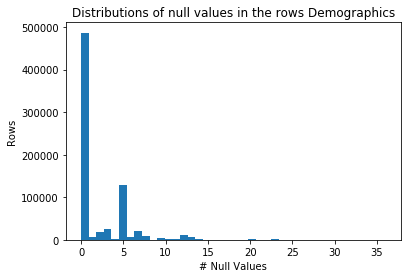

In [22]:
# Now we can check again....
plt.hist(azdias.isnull().sum(axis=1), bins=40)
plt.title('Distributions of null values in the rows Demographics')
plt.xlabel('# Null Values')
plt.ylabel('Rows')

In [ ]:
azdias.CAMEO_DEUG_2015.value_counts()

In [ ]:
# Saving
azdias.to_feather('azdias_cols_dropped.feather')

In [ ]:
# Let's see how many rows, columns we are left with
azdias.shape

### Features Re-encoding
Some categorical features need re-encoding. We will look at the spreadsheet to choose which ones to re-encode.
Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, we need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values.

- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, we make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling will be necessary for the remaining two variable types: categorical, and 'mixed'.

Are there binary categorical features that need re-encoding?
Are there multi-level categorical features that need re-encoding?


In [177]:
azdias = pd.read_feather('azdias_cols_dropped.feather', nthreads=2)

/Users/maurizio/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [280]:
# Binary categorical features
# OST_WEST_KZ: flag indicating the former GDR/FRG
#azdias['OST_WEST_KZ'].value_counts()
def fix_binary_features(df):
    """
    """
    ost_west_dict = {'OST_WEST_KZ': {'W':0, 'O':1}}
    df = df.replace(ost_west_dict)
    return(df)

azdias = fix_binary_features(azdias)

Multi-level categoricals (three or more values) will be one-hot encoded using multiple dummy variables.

In [281]:
# Multi value features 

categorical_features = np.intersect1d(azdias_info[azdias_info.Type=='Categorical'].Attribute.values, azdias.columns.values)
azdias_info[azdias_info.Attribute.isin(categorical_features)]

,Attribute,Description,Meaning,Value,Type,Notes
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,unknown,-1,Categorical,NaN
131,CJT_GESAMTTYP,customer journey typology,unknown,0,Categorical,NaN
654,FINANZTYP,best descirbing financial type for the person,unknown,-1,Categorical,NaN
744,HEALTH_TYP,health typology,unknown,-1,Categorical,NaN
2070,REGIOTYP,neighbourhood,unknown,"-1, 0",Categorical,NaN
2084,RETOURTYP_BK_S,return type,unknown,0,Categorical,NaN
2202,SHOPPER_TYP,shopping typology,unknown,-1,Categorical,NaN
2229,WOHNLAGE,residential-area,unknown,-1,Categorical,NaN
2251,ZABEOTYP,typification of energy consumers,unknown,"-1, 9",Categorical,NaN
706,GEBAEUDETYP_RASTER,industrial areas,NaN,NaN,Categorical,NaN


In [282]:
# We drop LP_FAMILIE_GROB and one-hot encode the other categorical feats

one_hot_encode_cols = np.intersect1d(azdias_info[azdias_info.Type=='Categorical'].Attribute.values, azdias.columns.values)
one_hot_encode_cols = np.setdiff1d(one_hot_encode_cols, ['LP_FAMILIE_GROB'])

def encode_categorical(df, azdias_info):
    """
    """
    df = df.drop('LP_FAMILIE_GROB', axis=1)
    df = pd.get_dummies(df, columns=one_hot_encode_cols)
    
    return df

azdias = encode_categorical(azdias, azdias_info)

In [235]:
azdias.shape

(737288, 429)

### Engineer Mixed-Type Features
There are two of features that we marked as "mixed" in the azdias_info dataframe that require special treatment in order to be included in the analysis. 
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).


In [ ]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
#azdias['PRAEGENDE_JUGENDJAHRE'].value_counts()

azdias['PRAEGENDE_JUGENDJAHRE'].isnull().sum()

PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [283]:
# Mainstream feature
def engineer_variables(df):
    """
    """
    # MAINSTREAM AND GENERATION
    mainstream_dict = {1.0:1, 2.0:2, 3.0:1, 4.0:2, 5.0:1, 6.0:2, 7.0:2, 8.0:1, 9.0:2, 10.0:1, 11.0:2, 12.0:1, 13.0:2, 14.0:1, 15.0:2}
    df['MAINSTREAM'] = np.nan
    df['MAINSTREAM'] = df['PRAEGENDE_JUGENDJAHRE'].map(mainstream_dict)
    generation_dict = {1.0:1, 2.0:1, 3.0:2, 4.0:2, 5.0:3, 6.0:3, 7.0:3, 8.0:4, 9.0:4, 10.0:5, 11.0:5, 12.0:5, 13.0:5, 14.0:6, 15.0:6}
    df['GENERATION'] = np.nan
    df['GENERATION'] = df['PRAEGENDE_JUGENDJAHRE'].map(generation_dict)  
    df['WEALTH'] = df['CAMEO_INTL_2015'].apply(lambda x: np.floor_divide(float(x), 10) if float(x) else np.nan)
    df['FAMILY'] = df['CAMEO_INTL_2015'].apply(lambda x: np.mod(float(x), 10) if float(x) else np.nan) 
    # Remove old variables
    df = df.drop(['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015'],axis=1)
    return df

azdias = engineer_variables(azdias)   

In [237]:
# Now we will put all the cleaning into one function, so that we can apply it to the customer database later on
def clean_data(df, azdias_info):
    """
    """
    print("Converting unknown to nulls...")
    df = fix_cameo(df)
    df = fix_undocumented_nulls(df)
    df = unknown2nulls(df, azdias_info)
    print("Dropping columns...")
    df = drop_columns(df)
    df = drop_other_columns(df)
    df = drop_categorical(df)
    print("Dropping rows...")
    df = drop_rows(df)
    df = fix_binary_features(df)
    print("One hot encoding...")
    df = encode_categorical(df, azdias_info)
    print("Engineering new variables...")
    df = engineer_variables(df)
    print("Done.")

    return df

#azdias = clean_data(azdias, azdias_info)

In [284]:
azdias.to_feather('azdias_cleaned.feather')

## Feature Transformation

### Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features.  In this substep, we will  check the following:

- Before applying the scaler to the data, we need to make sure that we've cleaned the DataFrame of the remaining missing values. This could be as simple as just removing all data points with missing data, thereby losing a significative percentage of the data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. 
- We will separate categorical variables from ordinal and numeric ones, as we will use two different strategies for imputing. Then we intersect with the columns that have null values and finally we add the new engineered Mixed-Type Features
- When imputing, the biggest concern is introducing bias into the data, therefore it's advisable to use different strategies depending on the type of the data. We will use most frequent values for binary variable, median for ordinal ones, and categorical variables have been already handled by creating dummy columns. Finally for numeric columns, if they are skewed we will apply a logarithmic tranform, then impute the median.



In [238]:
azdias = pd.read_feather('azdias_cleaned.feather', nthreads=2)

/Users/maurizio/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [161]:
azdias.columns[azdias.isnull().any()]

Index(['ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ARBEIT',
       'BALLRAUM', 'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3',
       'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_BANKEN_ONLINE_QUOTE_12',
       'D19_GESAMT_ONLINE_QUOTE_12', 'D19_TELKO_ONLINE_QUOTE_12',
       'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12', 'EWDICHTE',
       'FIRMENDICHTE', 'HH_DELTA_FLAG', 'INNENSTADT', 'KBA05_AUTOQUOT',
       'KBA05_HERSTTEMP', 'KKK', 'KOMBIALTER', 'KONSUMNAEHE', 'KONSUMZELLE',
       'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'ONLINE_AFFINITAET', 'ORTSGR_KLS9',
       'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX',
       'PLZ8_GBZ', 'PLZ8_HHZ', 'RELAT_AB', 'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN',
       'RT_UEBERGROESSE', 'STRUKTURTYP', 'UMFELD_ALT', 'UMFELD_JUNG',
       'VERS_TYP', 'VHN', 'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH',
       'MAINSTREAM', 'GENERATION', 'WEALTH', 'FAMILY'],
      dtype='object')

We have a problem with the D19_ that have a very high number of null values. 
Imputing with a median would introduce an unacceptable bias as the second most frequent value is usually in the few thousands.
Therefor we will:
- impute a zero in the D19_.._QUOTE12 variables (equivalent to "no Online-transactions within the last 12 months")


In [239]:
d19_impute_zero = ['D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12']

In [240]:
# Now for the other columns we need to know which are numerical, ordinal, categorical. 
#And we shoudn't forget the last 4 column we added
columns_with_nulls = azdias.columns[azdias.isnull().any()]
# The columns we added manually are the last 4, plus KBA05_GBZ' that need to be added to the list
# because it has nulls in the customer dataset, otherwise the pca transform will fail

cols_to_impute = np.setdiff1d(columns_with_nulls, d19_impute_zero)

numeric2impute = azdias_info[(azdias_info.Attribute.isin(cols_to_impute)) & (azdias_info.Type =='Numeric')].Attribute.values
categorical2impute = azdias_info[(azdias_info.Attribute.isin(cols_to_impute)) & (azdias_info.Type =='Categorical')].Attribute.values
ordinal2impute = azdias_info[(azdias_info.Attribute.isin(cols_to_impute)) & (azdias_info.Type =='Ordinal')].Attribute.values
binary2impute = azdias_info[(azdias_info.Attribute.isin(cols_to_impute)) & (azdias_info.Type =='Binary')].Attribute.values
binary2impute = np.append(binary2impute, 'MAINSTREAM')
ordinal2impute = np.concatenate((ordinal2impute, ['GENERATION', 'WEALTH', 'FAMILY', 'KBA05_GBZ']))




In [241]:
# Quickly check if we have everything
numeric2impute.size + binary2impute.size + ordinal2impute.size + len(d19_impute_zero)

55

In [48]:
# A look at the numerical variables 
azdias.ANZ_HAUSHALTE_AKTIV.skew(), azdias.ANZ_HH_TITEL.skew(), azdias.ANZ_PERSONEN.skew()

(8.720806697343331, 22.366734240379014, 1.9684237732931673)

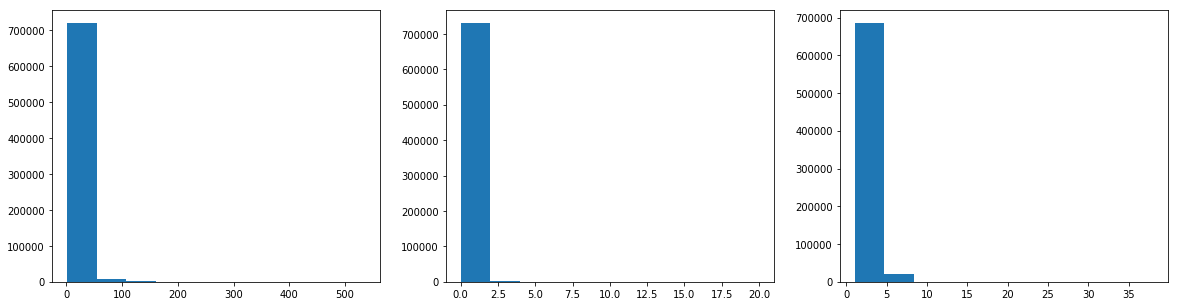

In [49]:
#We now have a look at the distributions of numerical variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.hist(azdias.ANZ_HAUSHALTE_AKTIV.dropna());
plt.subplot(1, 3, 2)
plt.hist(azdias.ANZ_HH_TITEL.dropna());
plt.subplot(1, 3, 3)
plt.hist(azdias.ANZ_PERSONEN.dropna());
plt.show()

The therendistributiones look all right skewed: when data are very non-normal (and e.g. needs a log-transformation to give approximate normality), then any imputation method assuming normality may not perform so well. Therefore we will log-tranform the numerical features before applying imputation

In [ ]:
numeric2impute

In [242]:
# Log transform numeric features
#from sklearn.preprocessing import FunctionTransformer
def log_transform_numeric(df):
    """
    
    """
    df['ANZ_HAUSHALTE_AKTIV'] = df['ANZ_HAUSHALTE_AKTIV'].apply(lambda x: np.log1p(1+x) if x != np.nan else x)
    df['ANZ_HH_TITEL'] = df['ANZ_HH_TITEL'].apply(lambda x: np.log1p(1+x) if x != np.nan else x)
    df['ANZ_PERSONEN'] = df['ANZ_PERSONEN'].apply(lambda x: np.log1p(1+x) if x != np.nan else x)
    
    return df

azdias = log_transform_numeric(azdias)


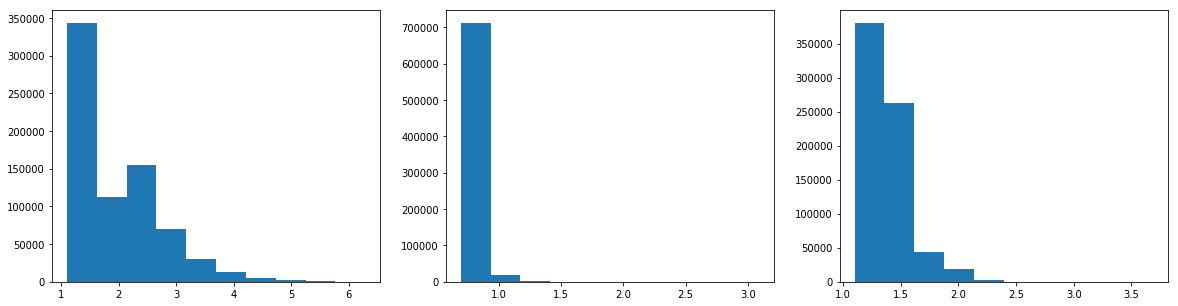

In [51]:
#We can have a look at the distributions of numerical variables again
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.hist(azdias.ANZ_HAUSHALTE_AKTIV.dropna());
plt.subplot(1, 3, 2)
plt.hist(azdias.ANZ_HH_TITEL.dropna());
plt.subplot(1, 3, 3)
plt.hist(azdias.ANZ_PERSONEN.dropna());
plt.show()

A bit better, but still skewed. So we will use meadian to impute instead of mean.

In [243]:
# Now we can impute: we need to save the fitted objects to use them with the customer data
from sklearn.impute import SimpleImputer
def impute_nulls(df, azdias_info, imputers = []):
    """
    
    """
    #The columns to impute should not be recomputed for the customer dataset again, so we leave it outside the function
    
    if imputers == []:
        # Ordinal features
        imputer_ordinal = SimpleImputer(strategy='median')
        df[ordinal2impute] = imputer_ordinal.fit_transform(df[ordinal2impute])
        # Numeric features
        imputer_numeric = SimpleImputer(strategy='median')
        df[numeric2impute] = imputer_numeric.fit_transform(df[numeric2impute])
        # Binary features
        imputer_binary = SimpleImputer(strategy='most_frequent')
        df[binary2impute] = imputer_binary.fit_transform(df[binary2impute])  
        # Set aside the fitted objects
        imputers = [imputer_ordinal, imputer_numeric, imputer_binary]
    else:
        # Extract imputers and transform only
        imputer_ordinal = imputers[0]
        imputer_numeric = imputers[1]
        imputer_binary = imputers[2]
        
        df[ordinal2impute] = imputer_ordinal.transform(df[ordinal2impute])
        df[numeric2impute] = imputer_numeric.transform(df[numeric2impute])
        df[binary2impute] = imputer_binary.transform(df[binary2impute])
    
    # Let's not forget the d19
    df[d19_impute_zero] = df[d19_impute_zero].fillna(0)
        
    return df, imputers

azdias, imputers = impute_nulls(azdias, azdias_info)

In [244]:
# Now we can apply Standard Scaling to all numerical and ordinal columns
from sklearn.preprocessing import StandardScaler

def scale_features(df, scaler=None):
    """
    
    """
    ordinal_features = np.intersect1d(azdias_info[azdias_info.Type=='Ordinal'].Attribute.values, df.columns.values)
    ordinal_features = np.concatenate((ordinal_features, ['GENERATION', 'WEALTH', 'FAMILY']))
    numeric_features = np.intersect1d(azdias_info[azdias_info.Type=='Numeric'].Attribute.values, df.columns.values)
    features_to_scale = np.concatenate((ordinal_features, numeric_features))
    if scaler == None:
        scaler=StandardScaler()
        df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
    else:
        # Transform only
        df[features_to_scale] = scaler.transform(df[features_to_scale])
    return df, scaler

azdias, scaler = scale_features(azdias)

/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [285]:
# Can be put all together in a function
def feature_transformation(df, azdias_info, imputers = [], scaler=None):
    """
    
    """
    print("Log Transforming numeric features...")
    df = log_transform_numeric(df)
    print("Imputing missing values...")
    df, imputers = impute_nulls(df, azdias_info, imputers)
    print("Scaling features...")
    df, scaler = scale_features(df, scaler)
    print("Done.")
    return df, imputers, scaler

azdias, imputers, scaler = feature_transformation(azdias, azdias_info)

Log Transforming numeric features...
Imputing missing values...
Scaling features...


/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maurizio/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Done.


In [55]:
imputers, scaler

([SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='median', verbose=0),
  SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='median', verbose=0),
  SimpleImputer(copy=True, fill_value=None, missing_values=nan,
         strategy='most_frequent', verbose=0)],
 StandardScaler(copy=True, with_mean=True, with_std=True))

In [286]:
azdias.to_feather('azdias_transformed.feather')

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

### PCA
On the scaled data, we are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [59]:
#azdias = pd.read_feather('azdias_scaled.feather', nthreads=2)
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(azdias)
azdias_pca = pca.transform(azdias)

In [106]:
def show_pca(pca):
    cumulative_ratios=np.zeros(len(pca.explained_variance_ratio_))
    for i in range(len(pca.explained_variance_ratio_)):
        cumulative_ratios[i]=np.sum(pca.explained_variance_ratio_[:i])
    plt.figure(figsize=(20,10))
    plt.plot(pca.explained_variance_ratio_)
    plt.plot(cumulative_ratios)
    plt.xlabel("Components")
    plt.ylabel("Explained Variance Ratio %")
    plt.title("PCA Components Explained Variance Ratios")
    plt.yticks(np.arange(0, 1, step=0.05))
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_)+2, step= (len(pca.explained_variance_ratio_) // 20)))
    plt.grid(linewidth=0.1)
    plt.legend(['Variance Ratio', 'Cumulative'], loc='center right')
    
show_pca(pca)

In [ ]:

np.sum(pca.explained_variance_ratio_[:155])

In [89]:
azdias.columns[azdias.isnull().any()]

Index(['HH_DELTA_FLAG', 'KONSUMZELLE', 'VERS_TYP', 'MAINSTREAM'], dtype='object')

The pca without parameters returned all the 431 components (same as n. of features)
The plot shows that over 80% of the variance is explained by the first 95 components, 90% by the first 155 components and after that it increases very slowly

So we will run it again but this time we want only 155 components. Also we are saving the pca object so we can ru it 
on the customer dataset later on

In [304]:
def apply_pca(df, n_components=155):
    """
    
    """
    pca = PCA(n_components=155)
    pca.fit(df)
    df_pca = pca.transform(df)
    
    return df_pca, pca

azdias_pca, pca = apply_pca(azdias)

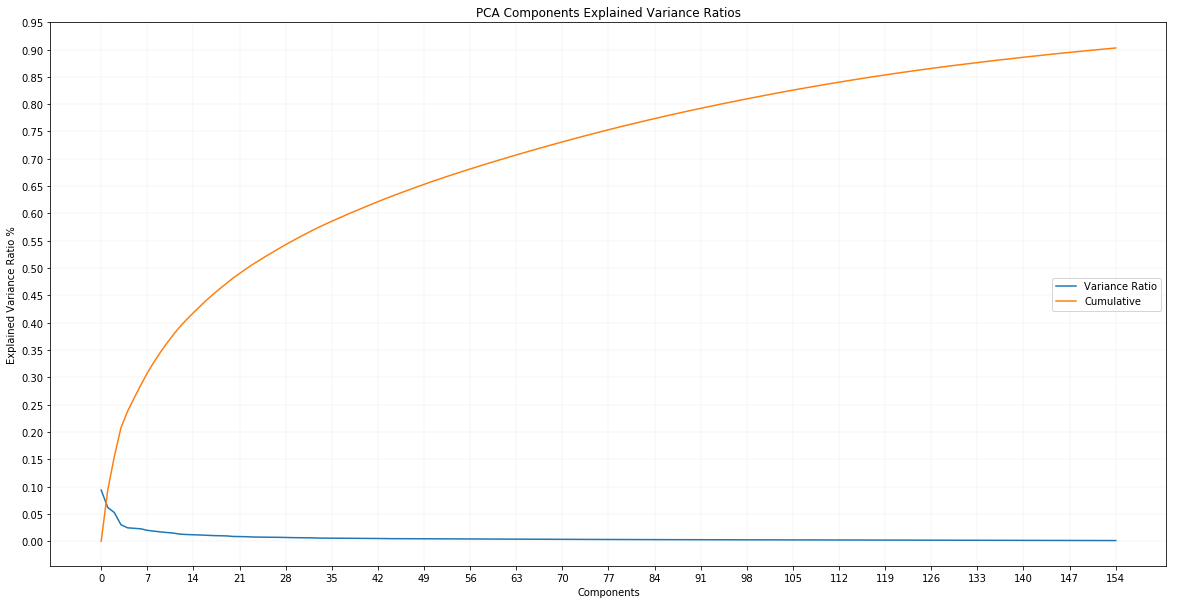

In [288]:
show_pca(pca)

In [289]:
def pca_results(full_dataset, pca, component):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (20,10))

    # Plot the feature weights as a function of the components
    features_to_show = components.iloc[component - 1].sort_values(ascending=False)
    features_to_show = features_to_show[np.absolute(features_to_show.values) >= 0.01]
    #components.iloc[component - 1].sort_values(ascending=False).plot(ax = ax, kind = 'bar');
    features_to_show.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(list(features_to_show.keys()), rotation=90)
    ax.set_xlabel("Features")

    # Display the explained variance ratios
    #for i, ev in enumerate(pca.explained_variance_ratio_):
    ev = pca.explained_variance_ratio_[component-1]
    
    plt.title("Component {} Explained Variance: {:.2f}%".format(component, ev*100))

    # Return a concatenated DataFrame
    #return pd.concat([variance_ratios, components], axis = 1).iloc[component - 1].sort_values(ascending=False)
    return features_to_show

PLZ8_ANTG3                    0.1527
KBA13_ANTG3                   0.1517
KBA13_ANTG4                   0.1487
KBA13_BAUMAX                  0.1479
PLZ8_ANTG4                    0.1472
PLZ8_BAUMAX                   0.1462
ANZ_HAUSHALTE_AKTIV           0.1433
WEALTH                        0.1381
HH_EINKOMMEN_SCORE            0.1339
EWDICHTE                      0.1225
ORTSGR_KLS9                   0.1219
FINANZ_HAUSBAUER              0.1052
ARBEIT                        0.1016
PLZ8_ANTG2                    0.1012
KBA13_HALTER_30               0.1009
KBA05_ANTG4                   0.0958
KBA13_HALTER_35               0.0945
KBA05_ANTG3                   0.0911
RELAT_AB                      0.0858
KBA05_BAUMAX                  0.0855
STRUKTURTYP                   0.0847
ANZ_STATISTISCHE_HAUSHALTE    0.0829
CJT_TYP_2                     0.0826
KBA13_ANTG2                   0.0775
KBA13_ALTERHALTER_30          0.0756
FINANZ_SPARER                 0.0731
KBA13_BJ_2000                 0.0641
V

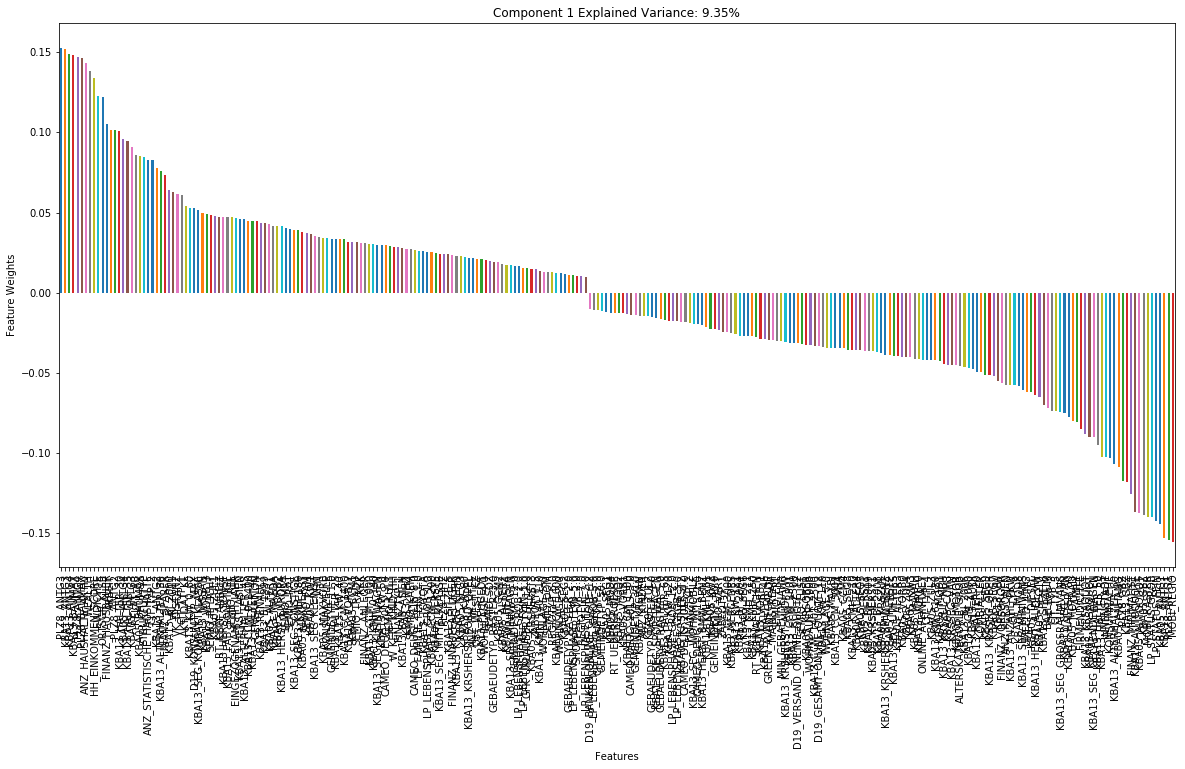

In [290]:
pca_results(azdias, pca, 1)

# First component
Positive correlations
PLZ8_ANTG3: # of 6-10 family houses in the area
PLZ8_ANTG4 # of +10 families in the area  
KBA13_BAUMAX : Building type
ANZ_HAUSHALTE_AKTIV # of households in the building
WEALTH: here small value means wealthy households, high values poorer households

Neg Correlations:
MOBI_REGIO: mobility patterns, where a higher value means low mobility, more stability
PLZ_ANTG1: share of small families
LP_STATUS_FEIN/GROB: Social status

So this component is positively correlated to share of bigger families (more densily populated, less wealthy) in the area and building and negatively correlated with social status and stability (younger, not wealthy thend to rent and change often) 

KBA13_HERST_BMW_BENZ           0.1891
KBA13_SEG_OBEREMITTELKLASSE    0.1622
KBA13_MERCEDES                 0.1608
KBA13_BMW                      0.1583
KBA13_SITZE_4                  0.1481
KBA13_SEG_SPORTWAGEN           0.1443
KBA13_KMH_211                  0.1332
KBA05_HERST1                   0.1322
KBA13_KMH_250                  0.1309
KBA13_KW_121                   0.1297
KBA13_SEG_OBERKLASSE           0.1272
KBA13_CCM_2501                 0.1230
KBA05_KW3                      0.1214
KBA13_CCM_3000                 0.1145
KBA05_MOTOR                    0.1134
KBA13_KRSHERST_BMW_BENZ        0.1129
KBA13_CCM_3001                 0.1092
KBA05_MOD1                     0.1075
KBA05_CCM4                     0.1073
EWDICHTE                       0.1058
KBA13_HALTER_65                0.0994
KBA05_SEG5                     0.0979
STRUKTURTYP                    0.0962
ORTSGR_KLS9                    0.0934
KBA13_CCM_2500                 0.0911
KBA05_CCM3                     0.0853
KBA05_SEG8  

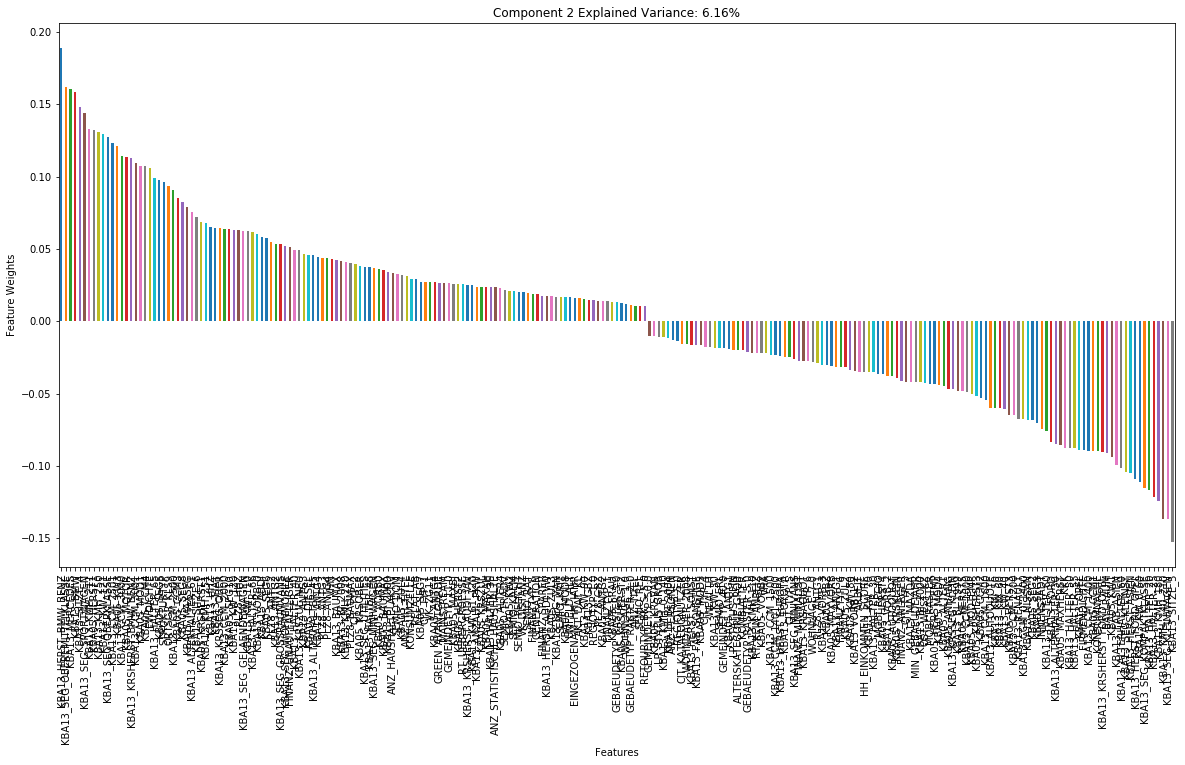

In [291]:
# Second component
pca_results(azdias, pca, 2)

### Second Component
Positive Corr:
KBA13_HERST_BMW_BENZ           0.1890: Share of BMW & Mercedes in the area
KBA13_SEG_OBEREMITTELKLASSE    0.1621: share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)
KBA13_MERCEDES                 0.1608: share of Mercedes in the area
KBA13_BMW : share of BMW in the area
KBA13_SEG_SPORTWAGEN: Share of sportcars
    
Negatice corr:
KBA13_SEG_KLEINWAGEN:    Share of small cars
KBA13_KMH_140_210 : Share of cars with max speed between 140 and 210
KBA13_HALTER_25, KBA13_HALTER_20: Young drivers

Looks like this component is positively correlated with uppr-middle class indicators like owning a BMW, Merc or Sportcar, mature drivers



KOMBIALTER                     0.2215
FINANZ_VORSORGER               0.1991
CJT_TYP_5                      0.1925
ALTERSKATEGORIE_GROB           0.1907
CJT_TYP_4                      0.1832
CJT_TYP_3                      0.1780
CJT_TYP_6                      0.1757
SEMIO_LUST                     0.1444
CJT_KATALOGNUTZER              0.1397
SEMIO_ERL                      0.1294
FINANZ_MINIMALIST              0.1078
W_KEIT_KIND_HH                 0.1062
ZABEOTYP_3                     0.0745
RETOURTYP_BK_S_5.0             0.0655
WOHNDAUER_2008                 0.0614
FINANZ_HAUSBAUER               0.0593
KBA05_ALTER4                   0.0547
KBA13_ANTG3                    0.0542
EWDICHTE                       0.0531
PLZ8_ANTG3                     0.0526
ORTSGR_KLS9                    0.0509
KBA13_ANTG4                    0.0507
PLZ8_ANTG4                     0.0485
KBA05_MAXAH                    0.0478
ARBEIT                         0.0474
KBA05_VORB0                    0.0473
KBA13_BAUMAX

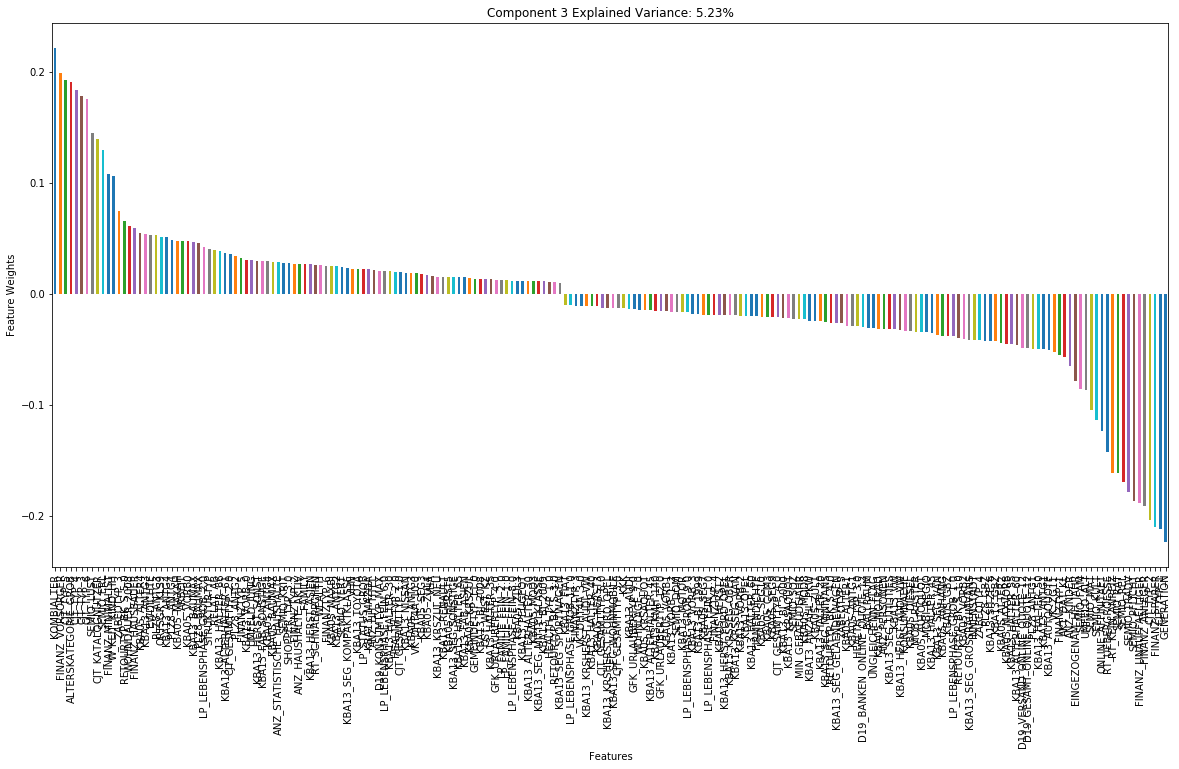

In [292]:
pca_results(azdias, pca, 3)

### Third Component

Positively Corr:
KOMBIALTER                     0.2217
FINANZ_VORSORGER               0.1992: Financially: be preparer
CJT_TYP_5                      0.1927  Customer-Journey-Typology relating to the preferred information and buying channels of consumers
                                       Advertising- and Cross-Channel-Enthusiast
ALTERSKATEGORIE_GROB           0.1909 Age classification: higher -> older
CJT_TYP_4                      0.1834 advertisinginterested Online-shopper
CJT_TYP_3                      0.1782  advertisinginterested Store-shopper
CJT_TYP_6 Advertising-Enthusiast with restricted Cross-Channel-Behaviour 

Neg Corr
SEMIO_PFLICHT                 -0.1870 Traditionally minded (higher == less affinity)
FINANZ_UNAUFFAELLIGER         -0.1888 Financial Typology: unremarkable (higher = low)
FINANZ_ANLEGER                -0.1915 Investor? (high value = low likelihood)
CJT_TYP_2                     -0.2043 Advertising- and Consumptiontraditionalist
FINANZ_SPARER                 -0.2101 money saver (low value = very high)
CJT_TYP_1                     -0.2119 Advertising- and Consumptionminimalist
GENERATION (higher values == younger)

So this component is indicating the Customer Journey, positively correlated with younger and more 
multi-channel enthusiast people and negatively correlated with traditionalist, older people


In [ ]:
pca_results(azdias, pca, 4)

Pos
KBA13_KW_61_120            0.1824 share of cars with an engine power between 61 and 120 KW - PLZ8
KBA13_KMH_210              0.1687 share of cars with an engine powermore than 210 - PLZ8
KBA13_VORB_0               0.1524 share of cars with no preowner - PLZ8
KBA13_CCM_1401_2500        0.1518 share of cars with engine size between 1400cc and 2500c
KBA13_SITZE_5 share of cars with 5 seats

Neg:
 KBA13_SITZE_6             -0.1393 share of cars with more than 5 seats
KBA13_KMH_0_140           -0.1455 share of cars with max speed between 0 and 140 kmh
KBA13_CCM_0_1400          -0.1469 share of cars with less than 1400ccm within the PLZ8
KBA13_KMH_140             -0.1590  share of cars with max speed  140 kmh
KBA13_BJ_2000             -0.1746 share of cars built between 2000 and 2003
KBA13_KW_0_60  

Seems posivitely correlated to more powerful, bigger and new cars and negatively correlated with older cars with less power


### Summary Discussion: Interpret Principal Components
- First Component: 


- Second Component: 


- Third Component: 



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

In this step, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- We use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, we compute the average difference from each point to its assigned cluster's center.
- We perform the above two steps for a number of different cluster counts.
- We then select a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. We obtain the cluster assignments for the general demographics data.

I am using these functions instead of model.score to calculate the average distance of the points in the cluster 
from the centroid. I play with it first in two dimensions and then generalize to n-dimensions

Thanks to alphaleonis and Shay.G at https://stackoverflow.com/questions/40828929/sklearn-mean-distance-from-centroid-of-each-cluster for some of the code

uster import KMeans 

# Distance in two dimensions
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    # Calculate Euclidean distance for each data point assigned to centroid 
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    # return the mean value
    return np.mean(distances)


# Distance in n-dimensions
def k_mean_distance_n(data, centroid, i_centroid, cluster_labels):
    # Calculate Euclidean distance for each data point assigned to centroid 
    distances = [np.linalg.norm(x - centroid) for x in data[cluster_labels == i_centroid]]
    # return the mean value
    return np.mean(distances)

In [302]:
from sklearn.cluster import MiniBatchKMeans

# Distance in two dimensions
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    # Calculate Euclidean distance for each data point assigned to centroid 
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    # return the mean value
    return np.mean(distances)


# Distance in n-dimensions
def k_mean_distance_n(data, centroid, i_centroid, cluster_labels):
    # Calculate Euclidean distance for each data point assigned to centroid 
    distances = [np.linalg.norm(x - centroid) for x in data[cluster_labels == i_centroid]]
    # return the mean value
    return np.mean(distances)

In [ ]:
# We set the max number of clusters to 20
# This will take a while
    
# compute the average within-cluster distances.
def k_means_score(data, n_clusters):
    # Run k-means
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000)
    model = kmeans.fit(data)
    labels = model.predict(data)
    centroids = model.cluster_centers_
    
    total_distance = []
    for i, c in enumerate(centroids):
        # Function from above
        mean_distance = k_mean_distance_n(data, c, i, labels)
        total_distance.append(mean_distance)
    return(np.mean(total_distance))
  
scores = []
clusters = list(range(1,30))

import progressbar
cnter = 0
bar = progressbar.ProgressBar(maxval=len(clusters)+1, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

for n_clusters in clusters:
    scores.append(k_means_score(azdias_pca, n_clusters))
    cnter+=1 
    bar.update(cnter)


bar.finish()    
print(scores)

In [ ]:
# We will use the elbow method to find the ideal number of clusters
plt.plot(clusters, scores, linestyle='--', marker='o', color='b');
plt.xlabel('No of Clusters');
plt.ylabel('Average Distance');
plt.title('Average Distance vs. Clusters');


Running MiniBatchKMeans instead of KMeans makes the graph a bit bumpier as the average distance does not always decreases with increasing n. of clusters. However, the general trend is the same. 
The graph above shows an elbow at 16 clusters and after 20 the average distance  keeps on decreasing at much lower pace.

In [307]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
def apply_KMeans(df_pca):
    """
    
    """
    
    kmeans = MiniBatchKMeans(n_clusters=16, batch_size=50000)
    kmeans_model = kmeans.fit(df_pca)
    pop_labels = kmeans_model.predict(df_pca)
    pop_centroids = kmeans_model.cluster_centers_
    
    return pop_labels, pop_centroids, kmeans_model

gen_labels, gen_centroids, k_model = apply_KMeans(azdias_pca)

### Apply All Steps to the Customer Data

Now that we have clusters and cluster centers for the general population, we can see how the customer data maps on to those clusters. We will use the fits from the general population to clean, transform, and cluster the customer data. Finally we  will interpret how the general population fits apply to the customer data.

- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [293]:
customers = pd.read_csv('arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/Users/maurizio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [294]:
# Cleaning Data
#'CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP columns will be dropped
customers = customers.drop(labels=['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], axis=1)
customers = clean_data(customers, azdias_info)


[                                                                        ] N/A%

Converting unknown to nulls...


[========================================================================] 100%


Dropping columns...
Dropped 71 columns.
Dropping rows...
One hot encoding...
Engineering new variables...
Done.


In [295]:
# Feature Transformation
customers, imputers, scaler = feature_transformation(customers, azdias_info, imputers, scaler)


Log Transforming numeric features...
Imputing missing values...
Scaling features...


/Users/maurizio/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


Done.


In [298]:
# Applying Pca
cust_pca = pca.transform(customers)

In [308]:
# Clustering (16 clusters)
customer_labels = k_model.predict(cust_pca)
customer_centroids = k_model.cluster_centers_

### Step 3.3: Compare Customer Data to Demographics Data

In [309]:
np.bincount(gen_labels)/len(gen_labels)

array([0.06559445, 0.05907868, 0.04937555, 0.08175774, 0.05150226,
       0.04671309, 0.04229826, 0.0547181 , 0.07885792, 0.06853224,
       0.09398363, 0.0460824 , 0.04078732, 0.05544102, 0.08464806,
       0.08062928])

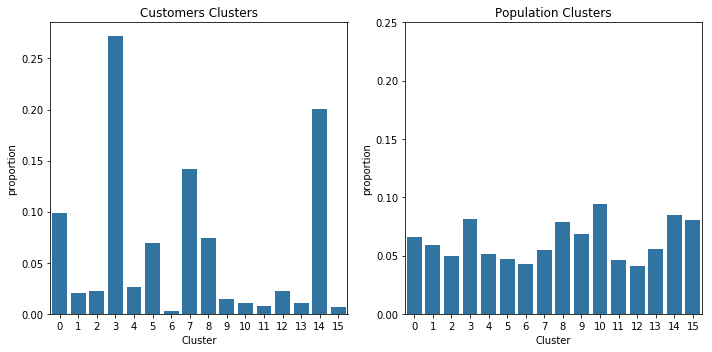

In [310]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
n_points = len(customer_labels)
max_count = np.max(np.bincount(customer_labels))
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Customers the plot
base_color = sns.color_palette()[0]
sns.countplot(x = customer_labels, color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('Cluster')
plt.title('Customers Clusters')
# Population plot
plt.subplot(1, 2, 2)
n_points = len(gen_labels)
max_count = np.max(np.bincount(gen_labels))
max_prop = max_count / n_points

sns.countplot(x = gen_labels, color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('Cluster')
plt.title('Population Clusters')
plt.tight_layout()



## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which i
ncludes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')